# Figure 4 and S18 code

**Import packages**

In [1]:
import importlib
import itertools
import matplotlib as plt
import functions_paper_1_MEE
from functions_paper_1_MEE import *
import rushd as rd
import seaborn as sns
exec(open("functions_paper_1_MEE.py").read())
sns.set_context('paper')
from statannot import add_stat_annotation

**Set paths for experimental data and create dictionaries to load in plates**

In [2]:
# Set paths to the experiment folder and where to find the data
datadir = Path(Path('../../datadir_mee.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
base_path = datadir/'instruments'/'data'/'attune'/'Mary'

Plates = {'2024.04.22_exp05_TRE3G': ['Plate1','Plate2','Plate3','Plate4'],
'2024.04.30_exp09_TRE3G_ZF10': ['Plate1', 'Plate2'],
'2024.05.17_exp09.03_Vlox90_178': ['Plate1', 'Plate2'],
'2024.05.27_exp09.05_Vlox90_178': ['Plate1', 'Plate2'],
'2024.05.30_exp09.06_300_500_CAGrTTA': ['Plate1_203', 'Plate2_300_500'],
'2024.06.03_exp09.07_300_CAG_rtTA': ['Plate1_300bp'],
'2024.06.06_exp09.08_500bp_2rep': ['Plate1'],
'2024.06.10_exp09.09_500bp_300_CN': ['Plate1', 'Plate2_500'],
'2024.06.14_exp09.10_203_300_500_CN': ['Plate1_500_203','Plate2_380_CN'],
'2024.06.28_exp09.12_Nested_Cag_rtTA': ['Plate1_Nested'],
'2024.07.05_exp09.14_Nested_rep2': ['Plate1_Nested']
}

exp_path = []
yaml_path = []

for i in Plates:
    for j in Plates[i]:
        exp_path.append(base_path/i/j/'export_singlets')
        if i == '2024.06.06_exp09.08_500bp_2rep' or ( i == '2024.06.03_exp09.07_300_CAG_rtTA' and j == 'Plate1_300bp'):
            yaml_path.append(base_path/i/j/'export_singlets'/'well_metadata.yaml')
            yaml_path.append(base_path/i/j/'export_singlets'/'well_metadata2.yaml')
            exp_path.append(base_path/i/j/'export_singlets')
        else:
            yaml_path.append(base_path/i/j/'export_singlets'/'well_metadata.yaml')

output_path = './figs_2024_promoter_editing_paper/figure4_S18_TET_DIAL/'

plates_dict = pd.DataFrame({
    'data_path' : [exp for exp in exp_path],
    'yaml_path' : [yaml for yaml in yaml_path]
})

display(plates_dict)

,data_path,yaml_path
0,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
1,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
2,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
3,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
4,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
5,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
6,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
7,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
8,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...
9,C:\Users\ChemeGrad2020\OneDrive - Massachusett...,C:\Users\ChemeGrad2020\OneDrive - Massachusett...


**Load in dataframes**

In [3]:
#Load data
data = pd.DataFrame()
channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data = rd.flow.load_groups_with_metadata(plates_dict.iloc[0:4,:],columns=channel_list) #Could add in columns=channel_list here to get specific columns

# Remove negative values from dataframe
for c in channel_list: data = data[data[c] > 0]

# Remove NaN values
data.dropna(inplace=True)


In [10]:

data1 = pd.DataFrame()
channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data1 = rd.flow.load_groups_with_metadata(plates_dict.iloc[4:11,:], 
                                          columns=channel_list
                                          )  #Could add in columns=channel_list here to get specific columns

# Remove negative values from dataframe
for c in channel_list: data1 = data1[data1[c] > 0]

# Remove NaN values
data1.dropna(inplace=True)



In [ ]:

data2 = pd.DataFrame()

channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data2 = rd.flow.load_groups_with_metadata(plates_dict.iloc[11:15,:],
                                          #columns=channel_list #Could add in columns=channel_list here to get specific columns
                                          ) 

# Remove negative values from dataframe
for c in channel_list: data2 = data2[data2[c] > 0]

# Remove NaN values
data2.dropna(inplace=True)


c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\rushd\flow.py:166: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(data_list, ignore_index=True).replace(np.NaN, pd.NA)  # type: ignore
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\rushd\flow.py:166: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(data_list, ignore_index=True).replace(np.NaN, pd.NA)  # type: ignore
c:\Users\chemegrad202\AppData\Local\Pr

In [ ]:

data3 = pd.DataFrame()

channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data3 = rd.flow.load_groups_with_metadata(plates_dict.iloc[15:18,:],
                                          columns=channel_list #Could add in columns=channel_list here to get specific columns
                                          ) 

# Remove negative values from dataframe
for c in channel_list: data3 = data3[data3[c] > 0]

# Remove NaN values
data3.dropna(inplace=True)



c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\rushd\flow.py:166: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(data_list, ignore_index=True).replace(np.NaN, pd.NA)  # type: ignore


In [ ]:

data5 = pd.DataFrame()

channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data5 = rd.flow.load_groups_with_metadata(plates_dict.iloc[18:22,:],
                                          #columns=channel_list
                                          ) #Could add in columns=channel_list here to get specific columns

# Remove negative values from dataframe
for c in channel_list: data5 = data5[data5[c] > 0]

# Remove NaN values
data5.dropna(inplace=True)

**Combine all dataframes and set extra conditions**

In [ ]:
data4 = pd.concat([data,data1, data2, data3, data5], ignore_index=True)
data4['conds'] = data4['reporter'] + '-' +data4['rTTA']+ '.' + data4['DOX']  +'.' + data4['CRE']
data4['cond4'] = data4['reporter'] +'.' + data4['CRE']

**Setting gates for co-transfection marker and mGL positive cells**

In [ ]:
dox_conds = ['1x','0.3162x', '0.1000x','0.0316x', '0.0100x', '0.0032x', '0.0010x', '0x']
# Set gates for data analysis
iRFP670_gate = 10000
mGL_gate = 200

# Gating on co-transfection marker
data_gated = data4[data4['iRFP670-A'] > iRFP670_gate]

# Adding positive markers for mGL positive cells
data_gated['mGL_gate'] = np.where(data_gated['mGL-A'] > mGL_gate, '+', '-') 

C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_19640\375532241.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gated['mGL_gate'] = np.where(data_gated['mGL-A'] > mGL_gate, '+', '-')


## Summary Statistics 

- Have 2 dataframes here
- df includes all reps with loxCN (n=5), Vlox90 (n = 3), lox203 (n=4), lox380 (n = 5) and lox610 (n=4)
    - df is only used for the summary plots S18D and 4E that have all spacer lengths and include stats
- df2 only includes loxCN (n=3), Vlox90 (n = 2), lox203 (n=3), lox380 (n = 4) and lox610 (n=3)
    - df2 is not used for any stats that require Vlox90 and only for scatters, fraction calculations, and histograms for the remaining spacer lengths

In [ ]:
df = data_gated #choose dataframe
df2 = data_gated[(data_gated['Date'] != '2024.04.22.x') & (data_gated['Date'] != '2024.06.10.x') ]

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'rTTA', 'DOX','DOX#','CRE','conds', 'cond4', 'Date'] #how to filter results, columns 

x = ['mGL-A', 'iRFP670-A','mRuby2-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_well_allreps = calc_stats(df,by,x,stat) #calculate statistics 
s_well_original = calc_stats(df2,by,x,stat)

# Create a summary dataframe with gating on mGL positive cells
by = ['reporter', 'rTTA', 'DOX','DOX#','CRE','conds', 'cond4', 'Date', 'mGL_gate']
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_well_pos_allreps = calc_stats(df,by,x,stat)
s_well_pos_original = calc_stats(df2,by,x,stat)

s_well_mGL_pos_allreps = s_well_pos_allreps[s_well_pos_allreps['mGL_gate'] == '+']
s_well_mGL_pos_original = s_well_pos_original[s_well_pos_original['mGL_gate'] == '+']

by = ['reporter', 'rTTA', 'DOX','DOX#','CRE','conds', 'cond4']
x = ['mGL-A_gmean', 'iRFP670-A_gmean','mRuby2-A_gmean']
stat = ['std', 'mean']

s_well_errors_allreps = calc_stats(s_well_mGL_pos_allreps, by, x, stat)
s_well_errors_original = calc_stats(s_well_mGL_pos_original, by, x, stat)


<string>:186: FutureWarning: The provided callable <function median at 0x000002A93B5228E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
<string>:186: FutureWarning: The provided callable <function std at 0x000002A9252DF060> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
<string>:186: FutureWarning: The provided callable <function mean at 0x000002A9252DEF20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
<string>:186: FutureWarning: The provided callable <function median at 0x000002A93B5228E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To kee

**Figure S18D: Summary plot of mGL gmean of 5 spacers lengths**

- loxCN n = 5
- Vlox90 n = 3
- lox203 n = 4
- lox380 n = 5
- lox610 n = 4

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lox203-3G_lox203-3G-EFS.1x.-CRE v.s. lox203-3G_lox203-3G-EFS.1x.+CRE: t-test independent samples, P_val=9.143e-04 stat=-6.061e+00
loxCN-3G_loxCN-3G-EFS.1x.-CRE v.s. loxCN-3G_loxCN-3G-EFS.1x.+CRE: t-test independent samples, P_val=1.172e-01 stat=1.756e+00
lox610-3G_lox610-3G-EFS.1x.-CRE v.s. lox610-3G_lox610-3G-EFS.1x.+CRE: t-test independent samples, P_val=1.001e-05 stat=-1.355e+01
lox380-3G_lox380-3G-EFS.1x.-CRE v.s. lox380-3G_lox380-3G-EFS.1x.+CRE: t-test independent samples, P_val=6.731e-05 stat=-7.530e+00
Vlox90-3G_Vlox90-3G-EFS.1x.-CRE v.s. Vlox90-3G_Vlox90-3G-EFS.1x.+CRE: t-test independent samples, P_val=3.527e-01 stat=-1.051e+00


<Figure size 250x200 with 0 Axes>

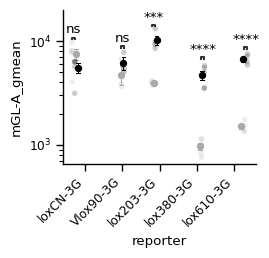

<Figure size 640x480 with 0 Axes>

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean']
repts = pd.array( [ 'loxCN-3G','Vlox90-3G','lox203-3G', 'lox380-3G', 'lox610-3G']) 

hue_order2 = pd.array([
'loxCN-3G-EFS.1x.-CRE', 'loxCN-3G-EFS.1x.+CRE',
'lox203-3G-EFS.1x.-CRE', 'lox203-3G-EFS.1x.+CRE',
'Vlox90-3G-EFS.1x.-CRE', 'Vlox90-3G-EFS.1x.+CRE',
'lox380-3G-EFS.1x.-CRE', 'lox380-3G-EFS.1x.+CRE',
'lox610-3G-EFS.1x.-CRE', 'lox610-3G-EFS.1x.+CRE'])

data_now = s_well_mGL_pos_allreps[s_well_mGL_pos_allreps['conds'].isin(hue_order2)]

pairs = [
[('loxCN-3G','loxCN-3G-EFS.1x.+CRE'), ('loxCN-3G','loxCN-3G-EFS.1x.-CRE')],
[('lox203-3G','lox203-3G-EFS.1x.+CRE'),('lox203-3G','lox203-3G-EFS.1x.-CRE')],
[('lox610-3G','lox610-3G-EFS.1x.+CRE'),('lox610-3G','lox610-3G-EFS.1x.-CRE')],
[('lox380-3G','lox380-3G-EFS.1x.+CRE'), ('lox380-3G','lox380-3G-EFS.1x.-CRE')],
[('Vlox90-3G','Vlox90-3G-EFS.1x.+CRE'), ('Vlox90-3G','Vlox90-3G-EFS.1x.-CRE')]]

xsize = 2.5; ysize=2

g = plt.figure(figsize=(xsize,ysize))

palette = {
'loxCN-3G-EFS.1x.+CRE': 'black',
'loxCN-3G-EFS.1x.-CRE':'darkgray',
'Vlox90-3G-EFS.1x.+CRE': 'black',
'Vlox90-3G-EFS.1x.-CRE':'darkgray',
'lox203-3G-EFS.1x.-CRE': 'darkgray',                                                
'lox203-3G-EFS.1x.+CRE': 'black',
'lox380-3G-EFS.1x.+CRE': 'black',
'lox380-3G-EFS.1x.-CRE':'darkgray',
'lox610-3G-EFS.1x.+CRE': 'black',
'lox610-3G-EFS.1x.-CRE':'darkgray'}
markers = pd.array(['o','o', 'o','o', 'o','o', 'o','o', 'o','o'])

yscale = 'log'
g = summary_plot( x='reporter', y='mGL-A_gmean', hue='conds', data=data_now, pairs=pairs, yscale='log', legend=False,
                     #ylim=ylim,
                    x_rot=45, palette = palette, order=repts, hue_order=hue_order2, plottitle='',figsize=(xsize,ysize),
                    #type='pointplot', 
                    markers=markers
)
g = g.get_figure()
plottitle = 'FigureS18D_summary_plot.svg'
g.savefig((output_path + plottitle),bbox_inches='tight')


**Calculating fold change for all spacer lengths**

In [ ]:
# Normalized summary plots with 3 bioreps to lox203, loxCN, lox380, lox610 and Vlox90 -/+ Cre

bioreps_plot = pd.array(['2024.04.22.x','2024.04.30.x','2024.05.06.x','2024.05.17.x', '2024.05.27.x', '2024.05.30.x', '2024.06.03.x', '2024.06.03.xx', '2024.06.06.x','2024.06.10.x', '2024.06.06.xx', '2024.06.14.x'])

s_normalized = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = data_gated[(data_gated['Date'] == biorep) & (data_gated['rTTA'] == 'EFS')] #choose dataframe
    by = ['reporter', 'rTTA', 'DOX','DOX#','CRE','conds', 'cond4', 'Date']  #how to filter results, columns 
    x = ['mGL-A', 'iRFP670-A','mRuby2-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    if 'lox203-3G' in s_biorep['reporter'].values:
        lox203_3G_Cre = s_biorep[(s_biorep['reporter'] == 'lox203-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox203-3G-CRE value is ' +str(lox203_3G_Cre)+ '')

        lox203_3G_noCre = s_biorep[(s_biorep['reporter'] == 'lox203-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox203-3G-noCRE value is ' +str(lox203_3G_noCre)+ '')

    if 'loxCN-3G' in s_biorep['reporter'].values:
        loxCN_3G_Cre = s_biorep[(s_biorep['reporter'] == 'loxCN-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('loxCN-3G-CRE value is ' +str(loxCN_3G_Cre)+ '')

        loxCN_3G_noCre = s_biorep[(s_biorep['reporter'] == 'loxCN-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('loxCN-3G-noCRE value is ' +str(loxCN_3G_noCre)+ '')

    if 'lox380-3G' in s_biorep['reporter'].values:
        lox380_3G_Cre = s_biorep[(s_biorep['reporter'] == 'lox380-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox380-3G-CRE value is ' +str(lox380_3G_Cre)+ '')

        lox380_3G_noCre = s_biorep[(s_biorep['reporter'] == 'lox380-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox380-3G-noCRE value is ' +str(lox380_3G_noCre)+ '')

    if 'Vlox90-3G' in s_biorep['reporter'].values:
        Vlox90_3G_Cre = s_biorep[(s_biorep['reporter'] == 'Vlox90-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('Vlox90-3G-CRE value is ' +str(Vlox90_3G_Cre)+ '')

        Vlox90_3G_noCre = s_biorep[(s_biorep['reporter'] == 'Vlox90-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('Vlox90-3G-noCRE value is ' +str(Vlox90_3G_noCre)+ '')

    if 'lox610-3G' in s_biorep['reporter'].values:
        lox610_3G_Cre = s_biorep[(s_biorep['reporter'] == 'lox610-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox610-3G-CRE value is ' +str(lox610_3G_Cre)+ '')

        lox610_3G_noCre = s_biorep[(s_biorep['reporter'] == 'lox610-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox610-3G-noCRE value is ' +str(lox610_3G_noCre)+ '')

    def normalize_mGL_gmean(data):
        if data['reporter'] == 'lox203-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / lox203_3G_noCre
            else:
                return data['mGL-A_gmean'] / lox203_3G_noCre
        elif data['reporter'] == 'lox380-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / lox380_3G_noCre
            else:
                return data['mGL-A_gmean'] / lox380_3G_noCre
        elif data['reporter'] == 'loxCN-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / loxCN_3G_noCre
            else:
                return data['mGL-A_gmean'] /  loxCN_3G_noCre
        elif data['reporter'] == 'Vlox90-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / Vlox90_3G_noCre
            else:
                return data['mGL-A_gmean'] / Vlox90_3G_noCre
        elif data['reporter'] == 'lox610-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / lox610_3G_noCre
            else:
                return data['mGL-A_gmean'] / lox610_3G_noCre
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

# Only take those at 1x DOX concentration
s_normalized = s_normalized[s_normalized['DOX'] == '1x']
s_normalized = s_normalized.dropna()

lox203-3G-CRE value is 12254.551131063372
lox203-3G-noCRE value is 3697.256509704665
loxCN-3G-CRE value is 2395.2014837392917
loxCN-3G-noCRE value is 3320.0695612133422
Vlox90-3G-CRE value is 7500.32032516282
Vlox90-3G-noCRE value is 6345.4554573195455
lox203-3G-CRE value is 7031.94744869494
lox203-3G-noCRE value is 3055.0904355620737
loxCN-3G-CRE value is 3255.223144709166
loxCN-3G-noCRE value is 5361.230697523981


C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_19640\3421779988.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)


Vlox90-3G-CRE value is 2959.4884614648035
Vlox90-3G-noCRE value is 2549.1244881523667
Vlox90-3G-CRE value is 4676.584847097018
Vlox90-3G-noCRE value is 3485.963400366426
lox203-3G-CRE value is 7860.221762872763
lox203-3G-noCRE value is 3235.4184990405274
loxCN-3G-CRE value is 4769.011311099998
loxCN-3G-noCRE value is 6582.141929766808
lox380-3G-CRE value is 3733.6233041010414
lox380-3G-noCRE value is 670.396416399911
lox380-3G-CRE value is 1926.3355213933924
lox380-3G-noCRE value is 437.51419497244467
lox380-3G-CRE value is 2199.436350694248
lox380-3G-noCRE value is 392.33811246670575
lox610-3G-CRE value is 4136.80215573224
lox610-3G-noCRE value is 906.0526222611471
loxCN-3G-CRE value is 4552.319588642936
loxCN-3G-noCRE value is 5920.184577215337
lox380-3G-CRE value is 4010.1847336109827
lox380-3G-noCRE value is 703.8500323879047
lox610-3G-CRE value is 6218.786673579231
lox610-3G-noCRE value is 1204.6261304959485
lox610-3G-CRE value is 4409.547279145954
lox610-3G-noCRE value is 980.865

In [ ]:
s_normalized.to_excel('Figure4E_normalized_summary_stats.xlsx',index=False)

**Figure 4E: Summary plot of mGL fold change for 5 spacers**

- loxCN n = 5
- Vlox90 n = 3
- lox203 n = 4
- lox380 n = 5
- lox610 n = 4


c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


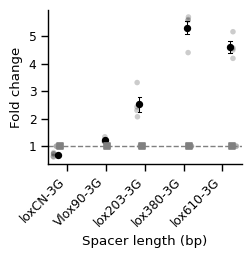

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 2.5; ysize=2
g = plt.figure(figsize=(xsize,ysize))
yscale = 'linear'
order_repts = pd.array( ['loxCN-3G','Vlox90-3G', 'lox203-3G', 'lox380-3G', 'lox610-3G'])
hue_order2 = pd.array([ 'loxCN-3G-EFS.1x.+CRE','loxCN-3G-EFS.1x.-CRE',
 'lox203-3G-EFS.1x.+CRE', 'lox203-3G-EFS.1x.-CRE',
 'Vlox90-3G-EFS.1x.+CRE',  'Vlox90-3G-EFS.1x.-CRE',
 'lox380-3G-EFS.1x.+CRE',  'lox380-3G-EFS.1x.-CRE',
 'lox610-3G-EFS.1x.+CRE', 'lox610-3G-EFS.1x.-CRE'])

palette = {'loxCN-3G-EFS.1x.+CRE': 'black',
 'lox203-3G-EFS.1x.+CRE': 'black',
 'Vlox90-3G-EFS.1x.+CRE':'black',
 'lox380-3G-EFS.1x.+CRE':'black',
 'lox610-3G-EFS.1x.+CRE': 'black',
 'loxCN-3G-EFS.1x.-CRE': 'gray',
 'lox203-3G-EFS.1x.-CRE': 'gray',
 'lox380-3G-EFS.1x.-CRE': 'gray',
 'lox610-3G-EFS.1x.-CRE': 'gray',
 'Vlox90-3G-EFS.1x.-CRE': 'gray'}
data_now = s_normalized[s_normalized['conds'].isin(hue_order2)]
plt.yticks(range(0,7))
plt.axhline(y=1, ls='--',lw=1, color='gray')
markers = pd.array(['o', 's','o', 's','o', 's','o', 's','o','s'])
plottitle = 'Figure4E_fold-change_all_length.svg'
g = summary_plot( x='reporter', y='Normalized_mGL-A_gmean', hue='conds', data=data_now, yscale=yscale, legend=False,
                     #ylim=ylim,
                    x_rot=45, palette = palette, order=order_repts, hue_order=hue_order2, plottitle='',xlabel='Spacer length (bp)',ylabel='Fold change',
                    type='pointplot', markers=markers)
g = g.get_figure()
g.savefig((output_path + plottitle),bbox_inches='tight')


**Calculate fold change for Figure S18E**

In [ ]:
bioreps_plot = pd.array(['2024.06.06.x', '2024.06.06.xx', '2024.06.14.x'])
dox = ['1x', '0.3162x','0.1000x', '0.0316x','0.0100x', '0.0032x', '0.0010x','0x']
s_normalized_610 = pd.DataFrame()


for biorep in bioreps_plot:
    CRE = []
    no_CRE = []
    df_biorep = data_gated[(data_gated['Date'] == biorep) &(data_gated['reporter'] == 'lox610-3G')] #choose dataframe
    by = ['reporter', 'rTTA', 'DOX','DOX#','CRE','conds', 'cond4', 'Date']  #how to filter results, columns 
    x = ['mGL-A', 'iRFP670-A','mRuby2-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    for i in range(8):
        if dox[i] in s_biorep['DOX'].values:
            lox610_Cre = s_biorep[ (s_biorep['CRE'] == '+CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == dox[i])]['mGL-A_gmean'].iloc[0]
            print('lox610'+'-' + str(dox[i]) + '-' + 'CRE value is ' +str(lox610_Cre)+ '')

            lox610_noCre = s_biorep[ (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS') & (s_biorep['DOX'] == dox[i])]['mGL-A_gmean'].iloc[0]
            print('lox610'+'-' + str(dox[i]) + '-' + 'noCRE value is ' +str(lox610_noCre)+ '')
            CRE.append(lox610_Cre)
            no_CRE.append(lox610_noCre)


    print(CRE)
    print(no_CRE)
    def normalize_mGL_gmean(data):
        dox = ['1x', '0.3162x','0.1000x', '0.0316x','0.0100x', '0.0032x', '0.0010x','0x']
        for i in range(8):
            if data['DOX'] == dox[i]:
                if (data['CRE'] == '+CRE'):
                    return data['mGL-A_gmean'] / no_CRE[i]
                else:
                    return data['mGL-A_gmean'] / no_CRE[i]

            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized_610 = pd.concat([s_normalized_610, s_biorep], ignore_index=True)


lox610-1x-CRE value is 4136.80215573224
lox610-1x-noCRE value is 906.0526222611471
lox610-0.3162x-CRE value is 3436.030782382403
lox610-0.3162x-noCRE value is 830.4220320805047
lox610-0.1000x-CRE value is 2213.980704605416
lox610-0.1000x-noCRE value is 666.7514752938677
lox610-0.0316x-CRE value is 1302.9090330857268
lox610-0.0316x-noCRE value is 469.2181541413712
lox610-0.0100x-CRE value is 424.42188633877635
lox610-0.0100x-noCRE value is 235.11581886707398
lox610-0.0032x-CRE value is 137.36531327942004
lox610-0.0032x-noCRE value is 96.51579019017503
lox610-0.0010x-CRE value is 59.244177947601216
lox610-0.0010x-noCRE value is 54.34390686699706
lox610-0x-CRE value is 53.31672889325276
lox610-0x-noCRE value is 50.16316862913966
[4136.80215573224, 3436.030782382403, 2213.980704605416, 1302.9090330857268, 424.42188633877635, 137.36531327942004, 59.244177947601216, 53.31672889325276]
[906.0526222611471, 830.4220320805047, 666.7514752938677, 469.2181541413712, 235.11581886707398, 96.51579019

In [ ]:
s_normalized_610.to_excel('FigureS18E_normalized_stats.xlsx', index=False)

**Figure S18E: Fold Change of 610 spacer**
- n = 3

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


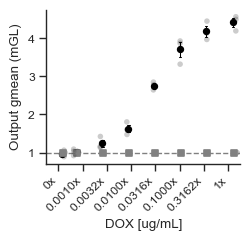

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 2.5; ysize=2
g = plt.figure(figsize=(xsize,ysize))
dox = ['0x', '0.0010x', '0.0032x','0.0100x', '0.0316x','0.1000x', '0.3162x','1x']

palette = { 'lox610-3G-EFS.0x.-CRE': 'gray',
        'lox610-3G-EFS.0x.+CRE': 'black',
        'lox610-3G-EFS.0.0010x.-CRE': 'gray',
        'lox610-3G-EFS.0.0010x.+CRE': 'black',
        'lox610-3G-EFS.0.0032x.-CRE': 'gray',
        'lox610-3G-EFS.0.0032x.+CRE': 'black',
        'lox610-3G-EFS.0.0100x.-CRE': 'gray',
        'lox610-3G-EFS.0.0100x.+CRE': 'black',
        'lox610-3G-EFS.0.0316x.-CRE': 'gray',
        'lox610-3G-EFS.0.0316x.+CRE': 'black',
        'lox610-3G-EFS.0.1000x.-CRE': 'gray',
        'lox610-3G-EFS.0.1000x.+CRE': 'black',
        'lox610-3G-EFS.0.3162x.-CRE': 'gray',
        'lox610-3G-EFS.0.3162x.+CRE': 'black',
        'lox610-3G-EFS.1x.-CRE': 'gray',
        'lox610-3G-EFS.1x.+CRE': 'black'}

sns.set_style('ticks')
data_now = s_normalized_610
markers = pd.array(['o', 's','o', 's','o', 's','o', 's','o','s','o','s','o','s','o','s'])
yscale = 'linear'
plt.axhline(y=1, ls='--',lw=1, color='gray')
plottitle = 'FigureS18E_fold_change_610.svg'
g = summary_plot( x='DOX', y='Normalized_mGL-A_gmean', hue='conds', data=data_now, yscale=yscale, legend=False,ylabel = 'Output gmean (mGL)', xlabel = 'DOX [ug/mL]',
                     #ylim=ylim,
                    x_rot=45, palette = palette, order=dox, plottitle='',
                    type='pointplot', markers=markers)

g = g.get_figure()
g.savefig((output_path + plottitle), bbox_inches='tight')

**Figure 4H, S18C: Fraction mGL+ graphs**

- lox203 n = 3
- lox380 n = 4
- lox610 n = 3

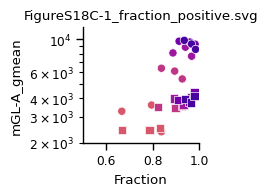

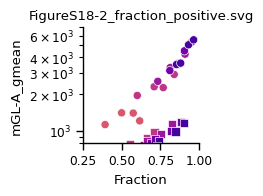

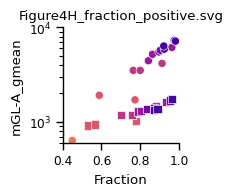

In [ ]:
xsize = 1.5; ysize = 1.5
hue_order_dox = dox_conds ; hue = 'DOX'
y= 'mGL-A_gmean'; x = 'Fraction'
hue_order = dox_conds ; style = 'cond4'
markers=['o','s']
order_repts = pd.array( ['lox203-3G', 'lox380-3G', 'lox610-3G'])
palette = 'plasma'
order_names = pd.array( ['FigureS18C-1', 'FigureS18-2', 'Figure4H'])

for i in range(3):
    g = plt.figure(figsize=(xsize,ysize))
    reporter = order_repts[i]
    plot = order_names[i]
    plottitle = plot + '_fraction_positive.svg'
    if (reporter == 'lox203-3G'):
        ylim = [2*10**3,1.2*10**4]
        xlim = [0.5,1]
    elif reporter == 'lox380-3G':
        ylim = [8*10**2,7*10**3]
        xlim = [0.25,1]
    elif reporter == 'lox610-3G':
        ylim = [6*10**2, 10**4]
        xlim = [0.4,1]
    data_now = s_well_mGL_pos_original[s_well_mGL_pos_original['reporter'] == (reporter)]
    g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                    style=style,xscale='linear', xlim=xlim, ylim=ylim,
                    hue_order=hue_order_dox,legend=False,
                    s= 35, plottitle=plottitle,markers=markers)
    g = g.get_figure()
    g.savefig((output_path + plottitle), bbox_inches = 'tight')

In [ ]:
df_new_1 = s_well_mGL_pos_original[(s_well_mGL_pos_original['reporter'] != 'loxnested-3G') & (s_well_mGL_pos_original['reporter'] != 'Vlox178-3G') & (s_well_mGL_pos_original['reporter'] != 'VloxCN-3G')]

In [ ]:
df_new_1.to_excel('Figure4H_S18C_summary_stats.xlsx', index=False)

**Figure 4D, S18A: Output mGL gmean vs DOX concentration**

- lox203 n = 3
- lox380 n = 4
- lox610 n = 3

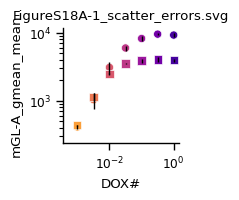

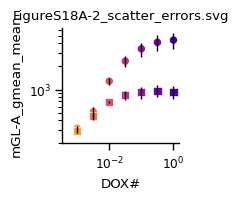

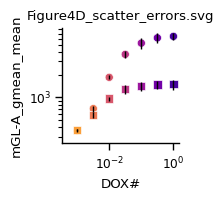

In [ ]:
xsize = 1.5; ysize = 1.5
hue_order_dox = dox_conds ; hue = 'DOX'
y = 'mGL-A_gmean_mean'
y_std = 'mGL-A_gmean_std'
x = 'DOX#'
hue_order = dox_conds ; style = 'cond4'
markers=['o','s']
order_repts = pd.array( ['lox203-3G', 'lox380-3G', 'lox610-3G'])
order_names2 = pd.array(['FigureS18A-1', 'FigureS18A-2', 'Figure4D'])
palette = 'plasma'

for i in range(3):
    g = plt.figure(figsize=(xsize,ysize))
    reporter = order_repts[i]
    plot2 = order_names2[i]
    data_now = s_well_errors_original[s_well_errors_original['reporter'] == reporter]
    plt.xscale("symlog", linthresh=1e-4)
    plottitle = plot2 + '_scatter_errors.svg'
    g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette,plottitle=plottitle,
                    style=style, hue_order=hue_order,yscale='log', markers=markers,ylabel= 'Output gmean (mGL)',xlabel='DOX [ug/mL]',
                    s= 35, fontsize=9.600000000000001,
                    std_y=y_std,legend=False)
    g = g.get_figure()
    g.savefig((output_path + plottitle), bbox_inches='tight')

In [ ]:
df_new = s_well_errors_original[(s_well_errors_original['reporter'] != 'loxnested-3G') & (s_well_errors_original['reporter'] != 'Vlox178-3G') & (s_well_errors_original['reporter'] != 'VloxCN-3G')]

In [ ]:
df_new.to_excel('Figure4D_S18A_summary_stats.xlsx', index=False)

**Figure 4C, S18B: Histograms of spacer lengths at dox concentrations**

- lox203 n = 3
- lox380 n = 4
- lox610 n = 3

In [ ]:
reporter_list = pd.array( ['lox203-3G','lox203-3G', 'lox380-3G','lox380-3G', 'lox610-3G','lox610-3G'])
CRE_list = ['+CRE','-CRE','+CRE','-CRE','+CRE','-CRE']
hue_order = []

for i in range(6):
    data_now = data_gated[(data_gated['reporter'] == reporter_list[i]) & ( data_gated['CRE'] == CRE_list[i])].copy()
    hue_order.append(pd.unique(data_now['conds']))


hue_order = pd.DataFrame({
    'reporter' : [rept for rept in reporter_list],
    'CRE' : [CRE for CRE in CRE_list],
    'hue_order' : [hue for hue in hue_order]
})
hue_order['condition'] = hue_order['reporter'] + '.' + hue_order['CRE']
hue_order = hue_order.set_index('condition')
display(hue_order)

,reporter,CRE,hue_order
condition,,,
lox203-3G.+CRE,lox203-3G,+CRE,"[lox203-3G-EFS.1x.+CRE, lox203-3G-EFS.0.3162x...."
lox203-3G.-CRE,lox203-3G,-CRE,"[lox203-3G-EFS.1x.-CRE, lox203-3G-EFS.0.3162x...."
lox380-3G.+CRE,lox380-3G,+CRE,"[lox380-3G-EFS.1x.+CRE, lox380-3G-EFS.0.3162x...."
lox380-3G.-CRE,lox380-3G,-CRE,"[lox380-3G-EFS.1x.-CRE, lox380-3G-EFS.0.3162x...."
lox610-3G.+CRE,lox610-3G,+CRE,"[lox610-3G-EFS.1x.+CRE, lox610-3G-EFS.0.3162x...."
lox610-3G.-CRE,lox610-3G,-CRE,"[lox610-3G-EFS.1x.-CRE, lox610-3G-EFS.0.3162x...."


c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

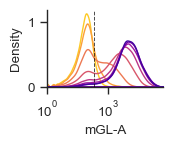

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

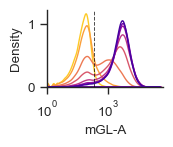

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

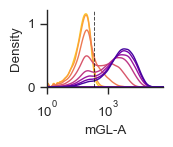

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

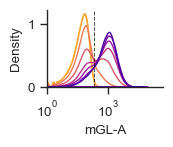

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

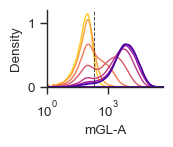

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

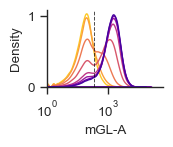

In [ ]:
xsize = 1.5
ysize = 1
fontsize=9.600000000000001
xlim = [.1e1, 5e5]

parameters = pd.array(['mGL-A'])
plottitle = pd.array(['FigureS18B-1.svg','FigureS18B-2.svg','FigureS18B-3.svg','Figure 18B-4.svg', 'Figure4C-1.svg', 'Figure4C-2.svg'])
palette = 'plasma'
for i in range(6):
    g = plt.figure(figsize=(xsize,ysize))
    hue_order_new = hue_order['hue_order'].iloc[i]
    data_now = data_gated[(data_gated['conds'].isin(hue_order_new)) & (data_gated['Date'] != '2024.04.22.x') & (data_gated['Date'] != '2024.06.10.x')]
    g = custom_hist_plot(data_now, parameters,hue='conds', palette=palette, 
                        hueorder=hue_order_new, alpha=0,line=mGL_gate,
                        fontsize=fontsize,xsize=xsize, ysize=ysize, legend=False,
                        xlim=xlim)
    g = g.get_figure()
    g.savefig((output_path + plottitle[i]),bbox_inches='tight')
